<a href="https://colab.research.google.com/github/apatino16/NaturalLanguageProcessing/blob/main/APatino_Homework6_%5BNLP%5D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# *Natural Language Processing* - Winter 2024 - Homework 6
> By Anny Patino

In [1]:
# Load Necessary Libraries
import tensorflow as tf

## Problem 1

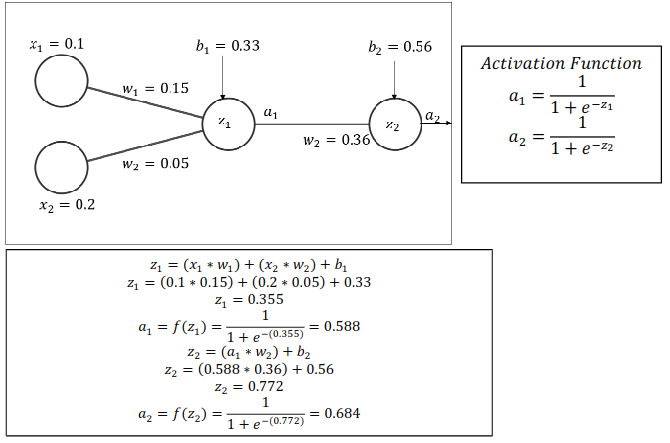

For the neural network described above, compute the value of the outputs `(𝑎1 𝑎𝑛𝑑 𝑎2)` if we change the sigmoid activation to the following 3 functions.

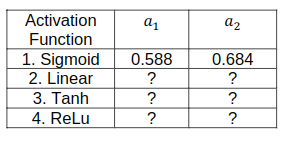

In [37]:
# Linear Function

# x1 input
x1 = tf.constant([[0.1]])
x2 = tf.constant([[0.2]])

# weights and bias
w1 = tf.constant([[0.15]])
w2 = tf.constant([[0.05]])
b1 = tf.constant([0.33])
b2 = tf.constant([0.56])

# Compute a1 using a linear activation function: a1 = Wx + b
a1_linear = tf.matmul(x1, w1) + tf.matmul(x2, w2) + b1

print('Linear Activation for a1')
print(a1_linear.numpy())

w3 = tf.constant([[0.36]])
a2_linear = tf.matmul(a1_linear, w3) + b2

print('\nLinear Activation for a2')
print(a2_linear.numpy())

Linear Activation for a1
[[0.35500002]]

Linear Activation for a2
[[0.68780005]]


In [44]:
# Hyperbolic Function

# Tanh Activation for a1
a1_tanh = tf.math.tanh(a1_linear)

print('Tanh Activation for a1')
print(a1_tanh.numpy())

# Tanh Activation for a2
a2_tanh = tf.math.tanh(a2_linear)

print('\nTanh Activation for a2')
print(a2_tanh.numpy())

Tanh Activation for a1
[[0.34080228]]

Tanh Activation for a2
[[0.59656686]]


In [48]:
# ReLU (Rectified Linear Unit) Function

# ReLU Activation for a1
a1_relu = tf.nn.relu(a1_linear)
print(a1_relu.numpy())

# ReLU Activation for a2
a2_relu = tf.nn.relu(a2_linear)
print(a2_relu.numpy())

[[0.35500002]]
[[0.68780005]]


## Problem 2

ReLu activation function reduces the effect of the vanishing gradient problem. That is the reason it is preferred over sigmoid and tanh activation functions.

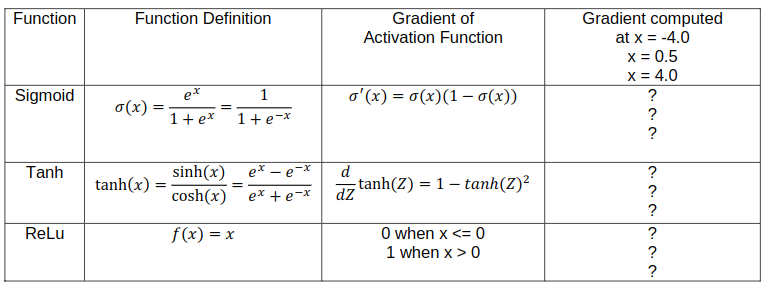

Write TensorFlow (or Numpy) code to compute the gradient of the 3 activation functions at the following point when:
* x = -4.0
* x = 0.5
* x = 4.0

In [59]:
# Defined the activation functions and their gradients
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

def sigmoid_grad(x):
    return sigmoid(x) * (1 - sigmoid(x))

def tanh_grad(x):
    return 1 - tf.square(tf.math.tanh(x))

def relu_grad(x):
    return tf.where(x > 0, tf.ones_like(x), tf.zeros_like(x))

# Points at which to compute the gradients
points = tf.constant([-4.0, 0.5, 4.0])

# Compute gradients for each activation function
sigmoid_gradients = sigmoid_grad(points)
tanh_gradients = tanh_grad(points)
relu_gradients = relu_grad(points)

print("Sigmoid Gradients:", sigmoid_gradients.numpy())
print("Tanh Gradients:", tanh_gradients.numpy())
print("ReLU Gradients:", relu_gradients.numpy())



Sigmoid Gradients: [0.01766271 0.23500371 0.01766273]
Tanh Gradients: [0.0013411 0.7864477 0.0013411]
ReLU Gradients: [0. 1. 1.]


## Problem 3

Usually Softmax function is used as an activation function in the output layer of a neural network.

Softmax function is defined as follows:

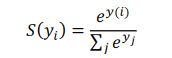

Compute the output a Softmax function using TensorFlow for the following 2 input vectors.
* V1 = (2.3, 1.2, 0.3, 0.0)
* V2 = (1.9, 1.7, 2.6, 0.2, 1.3)



In [23]:
# V1
scores = tf.constant([2.3, 1.2, 0.3, 0.0])
prob2 = tf.nn.softmax(scores)
print('Input Vector V1')
print(prob2.numpy())

Input Vector V1
[0.6375659  0.21222727 0.08628516 0.06392162]


In [24]:
# V2
scores = tf.constant([1.9, 1.7, 2.6, 0.2, 1.3])
prob2 = tf.nn.softmax(scores)
print('Input Vector V2')
print(prob2.numpy())

Input Vector V2
[0.21910708 0.17938972 0.44122744 0.04002725 0.12024851]


# Problem 4

A neural network is built for a dataset that has binary target value (0 or 1).

The cost function used for these applications is ‘cross entropy’ which is defined as follows:

```
𝐶𝑜𝑠𝑡 𝐹𝑢𝑛𝑐𝑡𝑖𝑜𝑛 = −( (𝑡𝑎𝑟𝑔𝑒𝑡 ∗ log(𝑐𝑜𝑚𝑝𝑉𝑎𝑙𝑢𝑒) + (1 − 𝑡𝑎𝑟𝑔𝑒𝑡) ∗ log(1 − 𝑐𝑜𝑚𝑝𝑉𝑎𝑙𝑢𝑒)) )
```
Compute the cost function values using TensorFlow for the following cases.

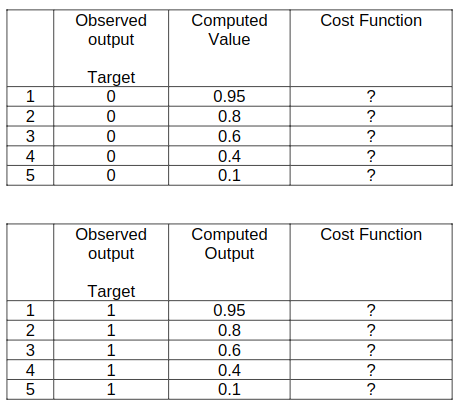




In [60]:
# Cross Entropy Function
def cross_entropy(y, p):
    return -tf.reduce_sum(y * tf.math.log(p) + (1 - y) * tf.math.log(1 - p))

In [61]:
# Target value is 0
y_0 = tf.constant(0, dtype=tf.float32)

# Computed output values
p_values = tf.constant([0.95, 0.8, 0.6, 0.4, 0.1], dtype=tf.float32)

# Compute cost function for each computed output
costs_0 = [cross_entropy(y_0, p) for p in p_values]

# Evaluate and print the costs
print("Cost function values for target 0:")
for i, cost in enumerate(costs_0, start=1):
    print(f"Case {i}: {cost.numpy()}")


Cost function values for target 0:
Case 1: 2.995732069015503
Case 2: 1.6094379425048828
Case 3: 0.916290819644928
Case 4: 0.5108255743980408
Case 5: 0.10536054521799088


In [63]:
# Target value is 1
y_1 = tf.constant(1, dtype=tf.float32)

# The computed values are the same, reuse p_values from Case 1

# Compute cost function for each computed output
costs_1 = [cross_entropy(y_1, p) for p in p_values]

# Evaluate and print the costs
print("Cost function values for target 1:")
for i, cost in enumerate(costs_1, start=1):
    print(f"Case {i}: {cost.numpy()}")

Cost function values for target 1:
Case 1: 0.051293306052684784
Case 2: 0.2231435328722
Case 3: 0.5108255743980408
Case 4: 0.9162907004356384
Case 5: 2.3025851249694824


## Problem 5

The TensorFlow `argmax` function returns the index of the maximum number. Suppose matrix `a` is defined as follows:

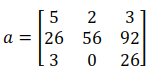

Compute the value of `a1` and `a2`:

In [25]:
a = tf.constant([[5, 2, 3], [26, 56, 96], [3, 0, 26]])
# print(a)

# a1
a1 = tf.argmax(a,axis=0)

print('Index of maximum column')
print(a1.numpy())

# a2
a2 = tf.argmax(a,axis=1)

print('\nIndex of maximum row')
print(a2.numpy())

Index of maximum column
[1 1 1]

Index of maximum row
[0 2 2]


## Problem 6

Compute the output of a Neural Network model using TensorFlow software with the following specifications:

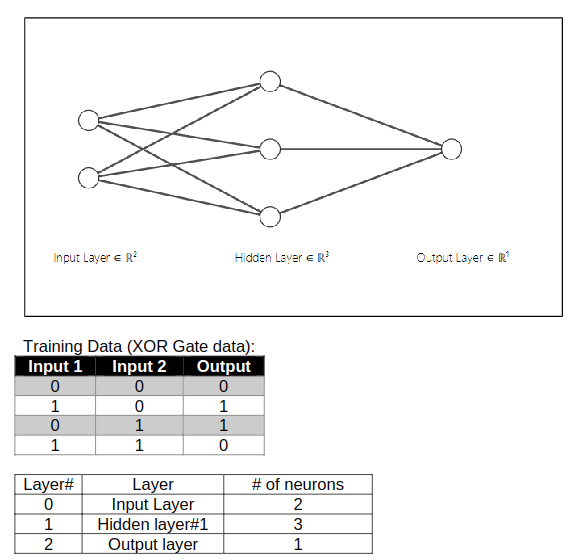

Activation function used:

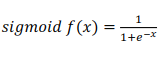

After running the neural network for many epochs, the following weights and biases were computed:

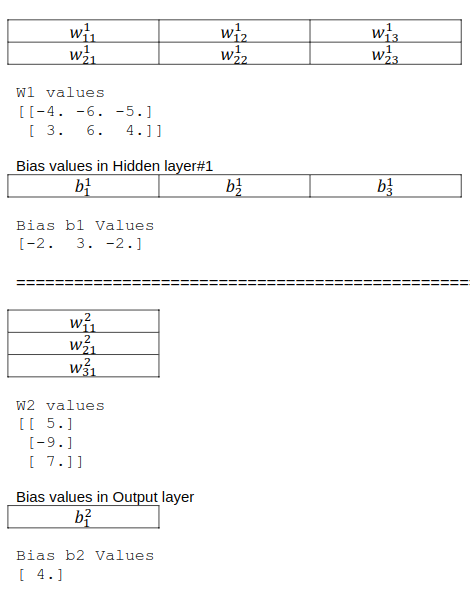


Compute the error for all 4 input values.
`𝐸𝑟𝑟𝑜𝑟 = (𝐶𝑜𝑚𝑝𝑢𝑡𝑒𝑑 𝑂𝑢𝑡𝑝𝑢𝑡 − 𝑇𝑟𝑢𝑒 𝑂𝑢𝑡𝑝𝑢𝑡)^2`

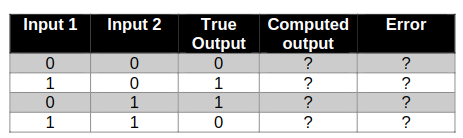



In [66]:
import tensorflow as tf
import numpy as np

# XOR input and output
X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]], dtype=np.float32)
Y = np.array([[0], [1], [1], [0]], dtype=np.float32)

# Model architecture
model = tf.keras.Sequential([
    tf.keras.layers.Dense(3, input_dim=2, activation='sigmoid', kernel_initializer=tf.constant_initializer([[-4., 3.], [-6., 6.], [-5., 4.]]), bias_initializer=tf.constant_initializer([-2., 3., -2.])),
    tf.keras.layers.Dense(1, activation='sigmoid', kernel_initializer=tf.constant_initializer([[5.], [-9.], [7.]]), bias_initializer=tf.constant_initializer([4.]))
])

# Compile the model (not required for forward pass, but included for completeness)
model.compile(optimizer='adam', loss='binary_crossentropy')

# Compute the model's output
predictions = model.predict(X)

# Calculate errors
errors = (Y - predictions)**2

# Display computed outputs and errors
for i, (input, pred, true, error) in enumerate(zip(X, predictions, Y, errors), 1):
    print(f"Input {i}: {input}, True Output: {true}, Computed Output: {pred}, Error: {error}")


1/1 [==============================] - 0s 56ms/step
Input 1: [0. 0.], True Output: [0.], Computed Output: [0.04137863], Error: [0.00171219]
Input 2: [1. 0.], True Output: [1.], Computed Output: [0.00694313], Error: [0.986162]
Input 3: [0. 1.], True Output: [1.], Computed Output: [0.99999917], Error: [6.963319e-13]
Input 4: [1. 1.], True Output: [0.], Computed Output: [0.5115919], Error: [0.2617263]
